### Dendrograms

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

#### Ex.1

In [4]:
import matplotlib.pyplot as plt

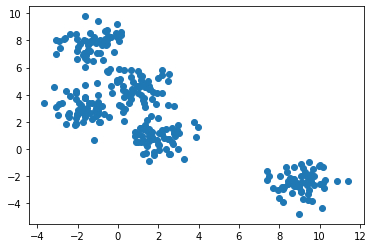

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#### Ex.2

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)

#### Ex.3

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

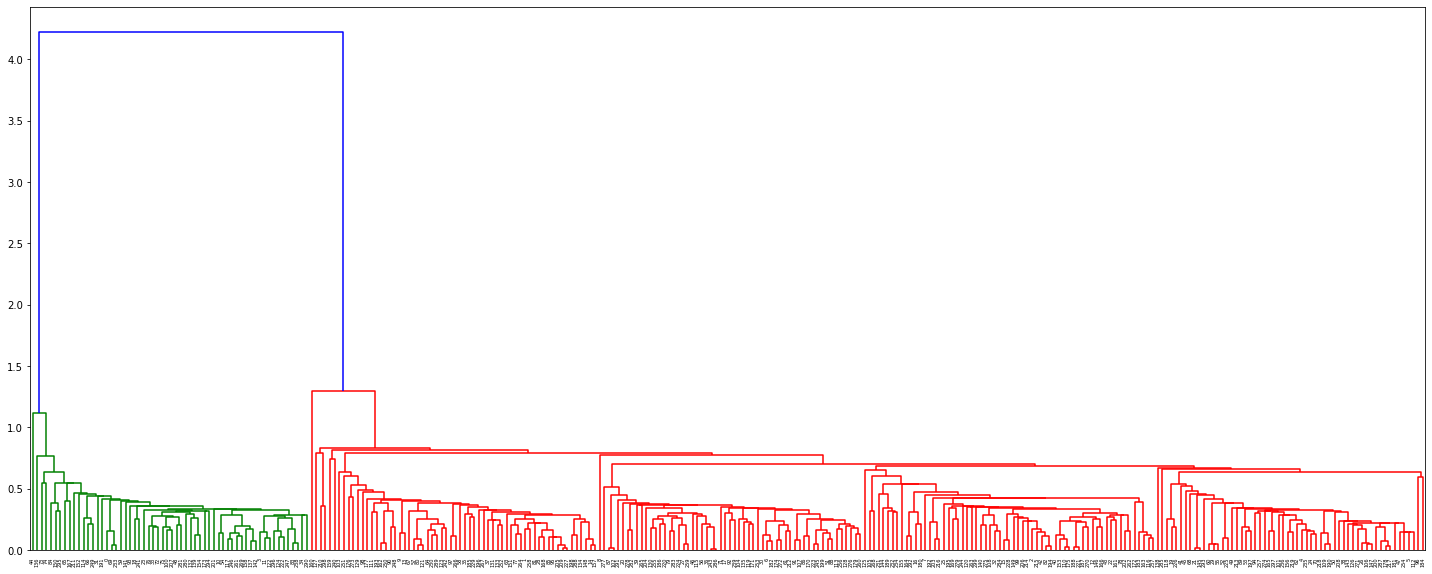

In [8]:
Z = linkage(X)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

#### Ex.4

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("shopping_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Ex.5

In [11]:
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


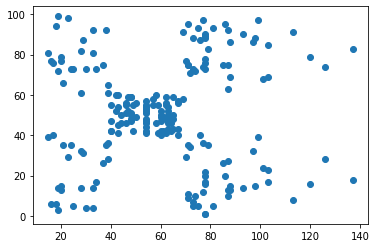

In [12]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.show()

#### Ex.6

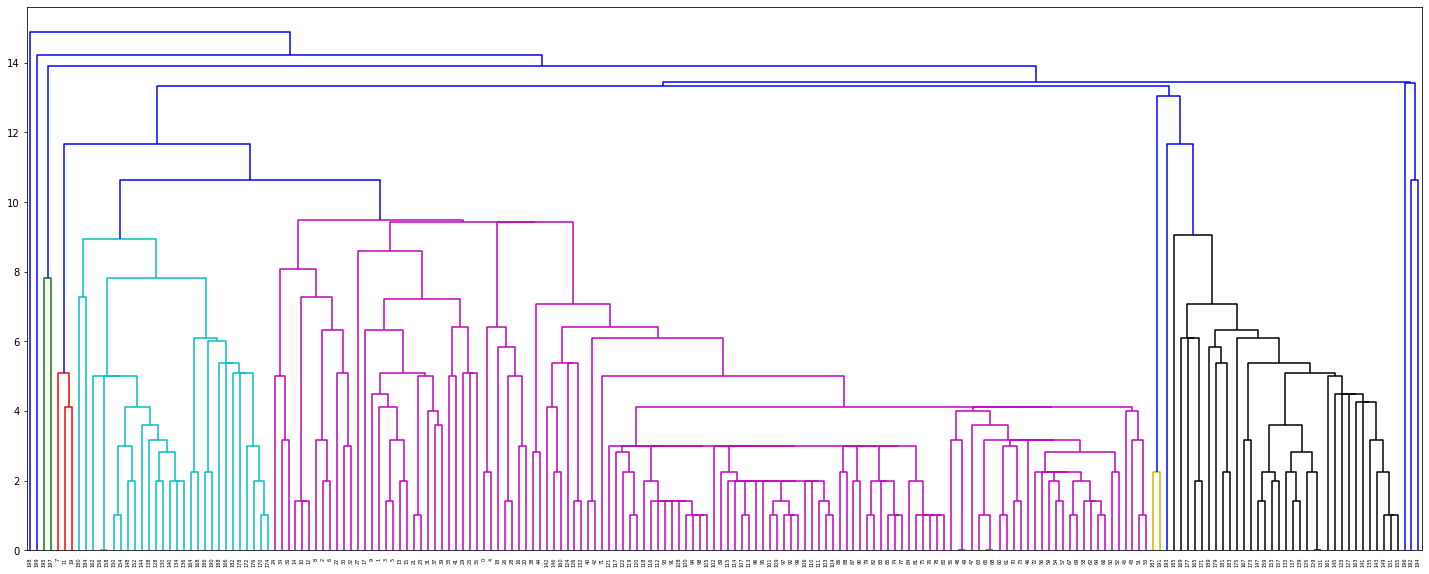

In [13]:
Z = linkage(data)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

#### looks like number of clusters will be 4 or 5 or 6 or 7 (red, green, yellow could be just a noise)

In [14]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()
ac.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

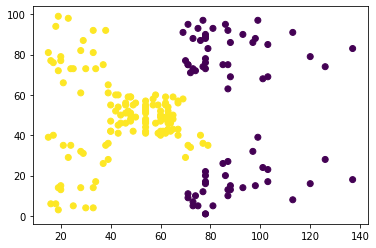

In [15]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=ac.labels_)

#### Ex.7, Ex.8, Ex.9

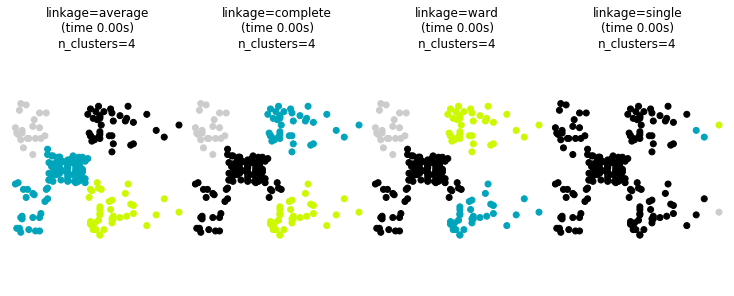

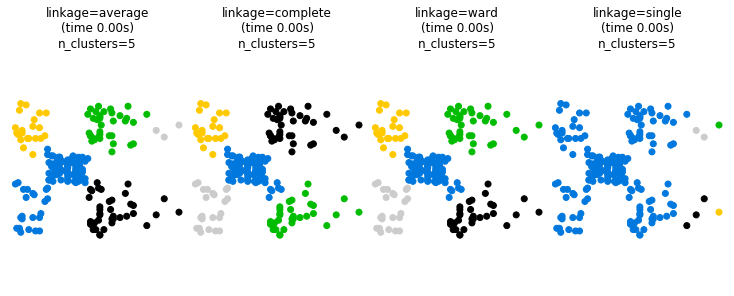

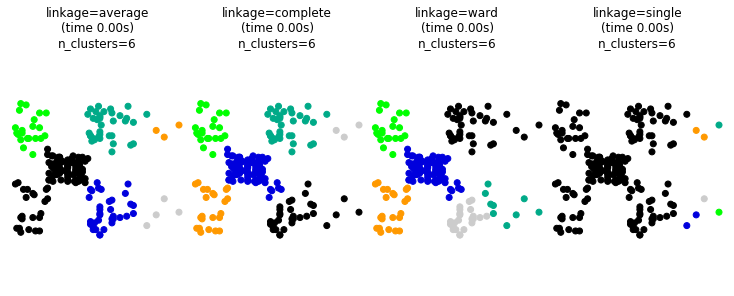

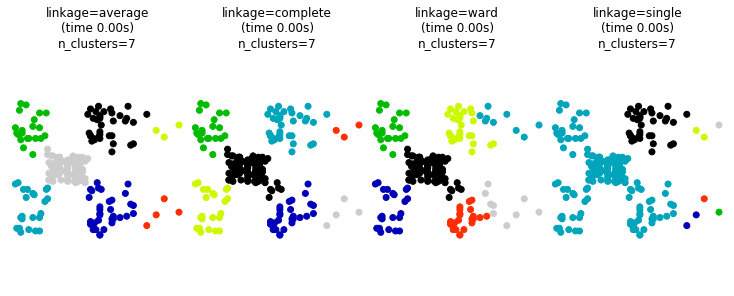

In [16]:
import time
for n_clusters in (4,5,6,7):
    plt.figure(figsize=(10, 4))
    for index, link in enumerate(('average',
                                     'complete',
                                     'ward',
                                     'single')):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(linkage=link,
                                        n_clusters=n_clusters)
        t0 = time.time()
        model.fit(data)
        elapsed_time = time.time() - t0
        plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=model.labels_,
                    cmap=plt.cm.nipy_spectral)
        plt.title('linkage=%s\n(time %.2fs)\nn_clusters=%d' % (link, elapsed_time, n_clusters),
                  fontdict=dict(verticalalignment='top'))
        plt.axis('equal')
        plt.axis('off')

        plt.subplots_adjust(bottom=0, top=.83, wspace=0,
                            left=0, right=1)


plt.show()

### Selecting the number of clusters with silhouette analysis on KMeans clustering

#### Ex.1

In [17]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

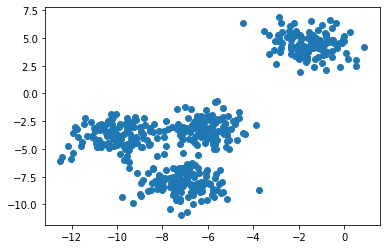

In [18]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#### i would take k as 2, 3, 4, 5 or 6

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


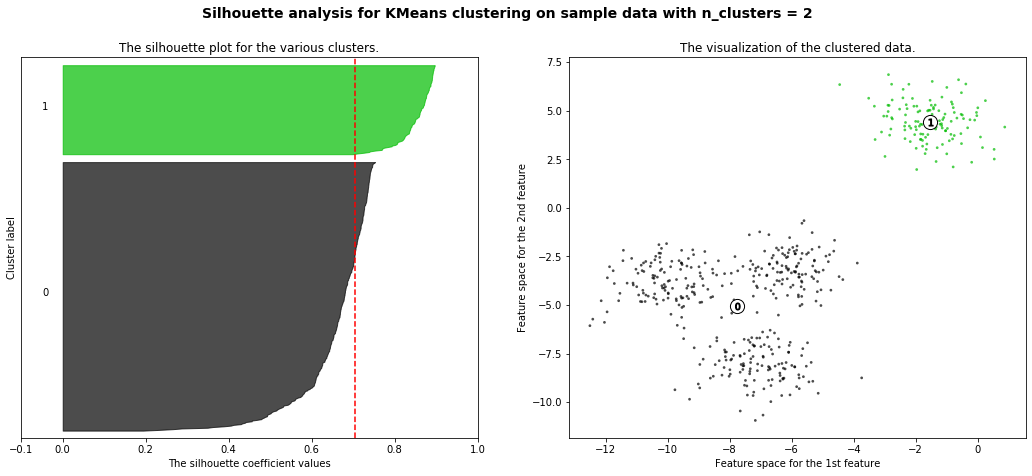

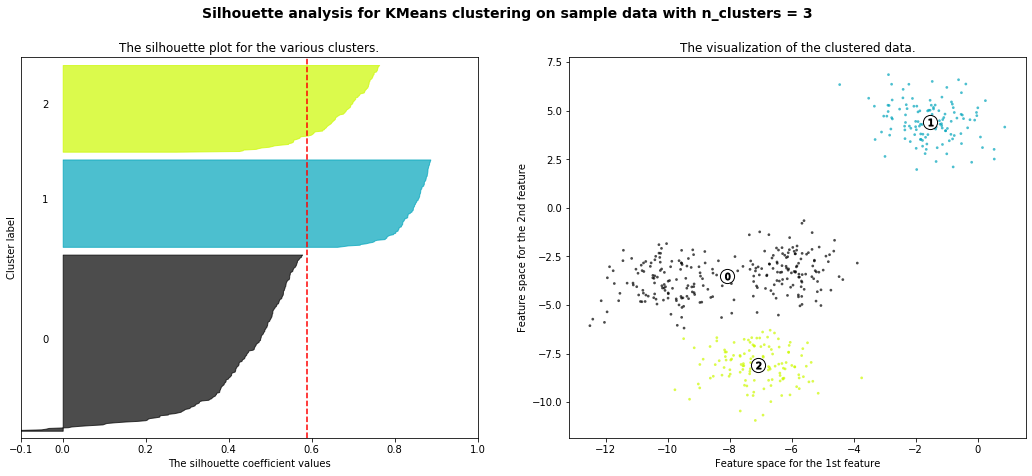

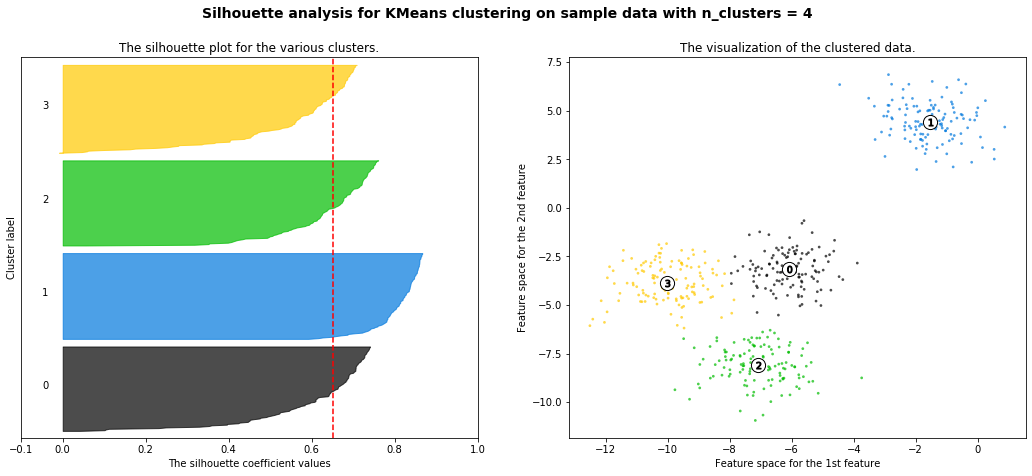

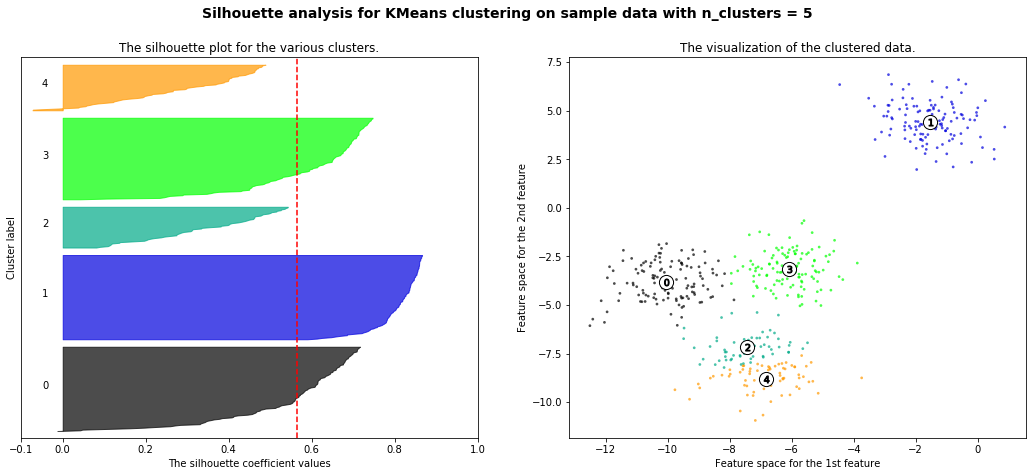

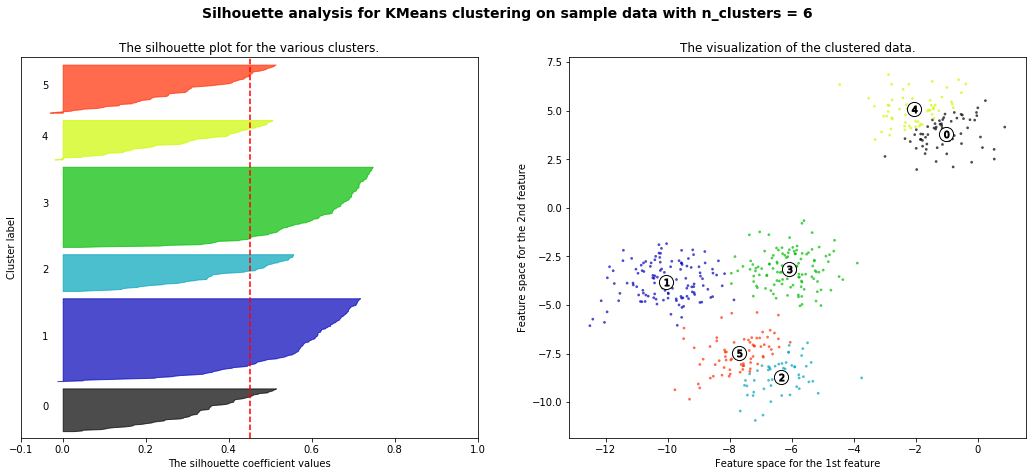

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### DBSCAN algorithm

#### Ex.1

In [20]:
from sklearn import  datasets
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [24]:
from sklearn.cluster import DBSCAN
models = {"DBSCAN": DBSCAN(min_samples=10), "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3), "KMeans": KMeans(init='random', n_clusters=3)}

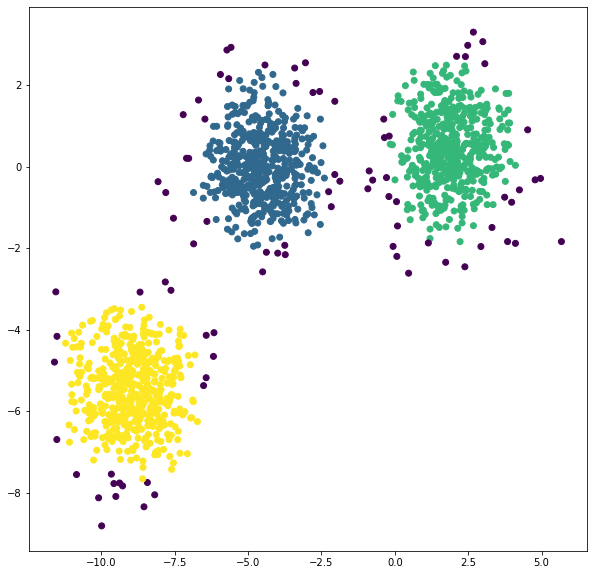

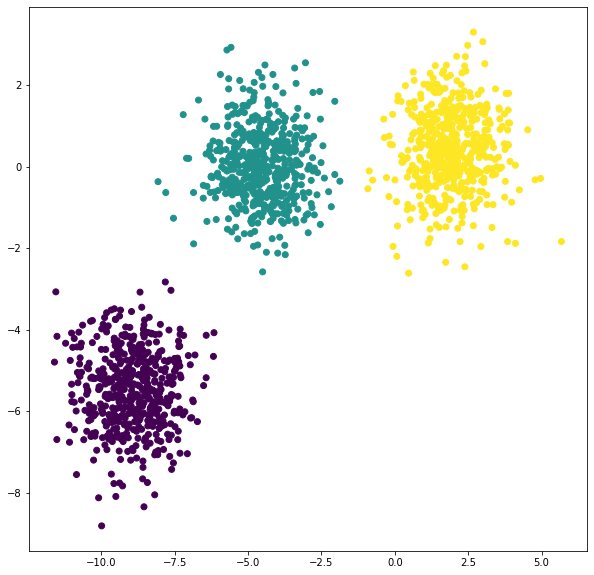

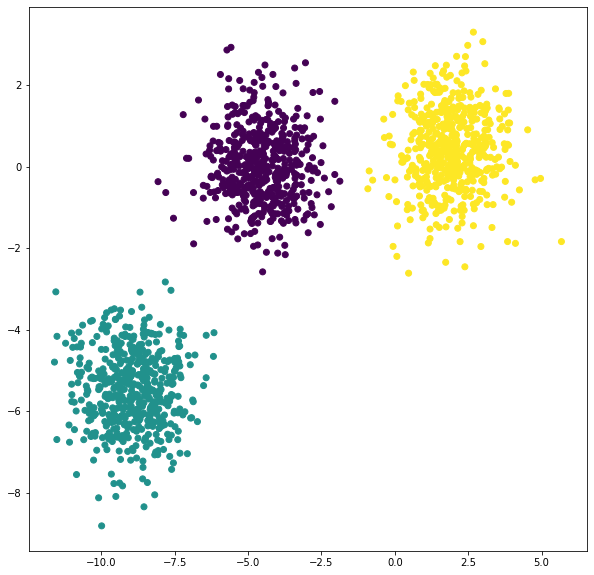

In [25]:
for model in models:
    models[model].fit(X)
    plt.figure(figsize=[10, 10])
    plt.scatter(X[:,0], X[:,1], c=model.labels_)